In [60]:
#BÀI Cifar100

In [61]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [62]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [88]:
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten


In [90]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 100)
y_test = keras.utils.to_categorical(y_test, 100)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [91]:
y_train.shape

(50000, 100)

In [92]:
y_test.shape

(10000, 100)

In [95]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(252,activation='relu'))
model.add(Dense(100,activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 128)       

In [96]:
history = model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_test,y_test))


Epoch 1/50
391/391 [==============================] - 4s 10ms/step - loss: 3.7685 - accuracy: 0.1338 - val_loss: 3.1989 - val_accuracy: 0.2252
Epoch 2/50
391/391 [==============================] - 3s 8ms/step - loss: 2.9268 - accuracy: 0.2779 - val_loss: 2.8012 - val_accuracy: 0.3120
Epoch 3/50
391/391 [==============================] - 3s 9ms/step - loss: 2.5486 - accuracy: 0.3541 - val_loss: 2.5817 - val_accuracy: 0.3476
Epoch 4/50
391/391 [==============================] - 3s 8ms/step - loss: 2.2800 - accuracy: 0.4091 - val_loss: 2.4317 - val_accuracy: 0.3832
Epoch 5/50
391/391 [==============================] - 3s 8ms/step - loss: 2.0674 - accuracy: 0.4558 - val_loss: 2.3798 - val_accuracy: 0.3949
Epoch 6/50
391/391 [==============================] - 3s 9ms/step - loss: 1.8910 - accuracy: 0.4978 - val_loss: 2.3263 - val_accuracy: 0.4161
Epoch 7/50
391/391 [==============================] - 4s 9ms/step - loss: 1.7359 - accuracy: 0.5314 - val_loss: 2.3364 - val_accuracy: 0.4218
Epoch

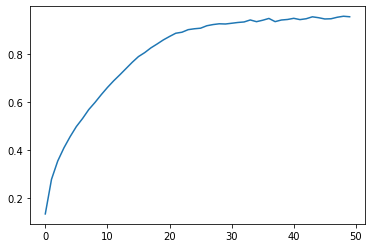

In [97]:
plt.plot(history.history['accuracy'])

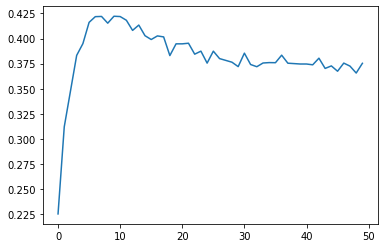

In [98]:
plt.plot(history.history['val_accuracy'])

In [99]:
model.save('cifar100.h5')

In [102]:
import numpy as np
from numpy import argmax
from keras.saving.save import load_model
#load model
model= load_model('cifar100.h5')
from keras.preprocessing.image import load_img,img_to_array





#dự đoán 
result= model.predict(x_test)




In [108]:
y_pred = np.argmax(result,axis=1)
y_pred

array([79, 38,  6, ..., 51, 88, 62])

In [109]:
np.argmax(y_test,axis=1)

array([49, 33, 72, ..., 51, 42, 70])

In [110]:
from sklearn import metrics


In [112]:
print(metrics.accuracy_score(np.argmax(y_test,axis=1),y_pred))

0.3753


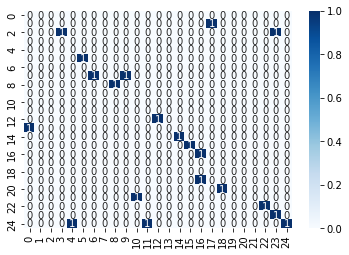

In [118]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matran = confusion_matrix(y_pred[:20],np.argmax(y_test,axis=1)[:20])
matran 
ax = sns.heatmap(matran, annot=True, cmap='Blues')
